In [15]:
library(readxl)
library(ggplot2)
library(Seurat)



In [16]:
getwd()

[1] "/Users/shiwani/Documents/GITHUB/Pediatric_Immuno-Oncology/Notebooks/clustering"

In [17]:
seurat_obj <- readRDS(paste0("./out/integrated_seurat_clusters_0.2.rds"))
print("Combined seurat object")
print(seurat_obj)


[1] "Combined seurat object"
An object of class Seurat 
21673 features across 31795 samples within 1 assay 
Active assay: RNA (21673 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap


In [18]:
head(seurat_obj@meta.data)

orig.ident  nCount_RNA
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT SCPCS000002 37293     
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG SCPCS000002 36546     
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG SCPCS000002 38553     
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT SCPCS000002 38019     
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC SCPCS000002 42958     
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC SCPCS000002 38022     
                                               nFeature_RNA diagnosis    age
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 6072         Glioblastoma 7  
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 5588         Glioblastoma 7  
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 5642         Glioblastoma 7  
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT 6575         Glioblastoma 7  
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC 6942         Glioblastoma 7  
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC 7026         Glioblastoma 7  
                                               sex tissue_location
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT F   Right thalamus 
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG F   Right thalamus 
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG F   Right thalamus 
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT F   Right thalamus 
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC F   Right thalamus 
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC F   Right thalamus 
                                               RNA_snn_res.0.1 seurat_clusters
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 3               5              
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 2               3              
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 2               3              
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT 3               5              
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC 7               26             
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC 0               16             
                                               pANN_1    ... RNA_snn_res.0.05
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 0.4285714 ... 3               
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 0.2857143 ... 2               
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 0.3809524 ... 2               
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT 0.5714286 ... 3               
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC 0.3333333 ... 6               
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC 0.2857143 ... 0               
                                               RNA_snn_res.0.2 RNA_snn_res.0.3
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 4               4              
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 2               2              
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 2               2              
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT 4               4              
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC 10              13             
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC 1               0              
                                               RNA_snn_res.0.4 RNA_snn_res.0.5
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 5               4              
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 2               3              
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 2               3              
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT 5               4              
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC 15              17             
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC 14              15             
                                               RNA_snn_res.0.6 RNA_snn_res.0.7
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT 4               5              
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG 2               1              
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG 2               1              
SCPCS000002_doubletfinder.rd

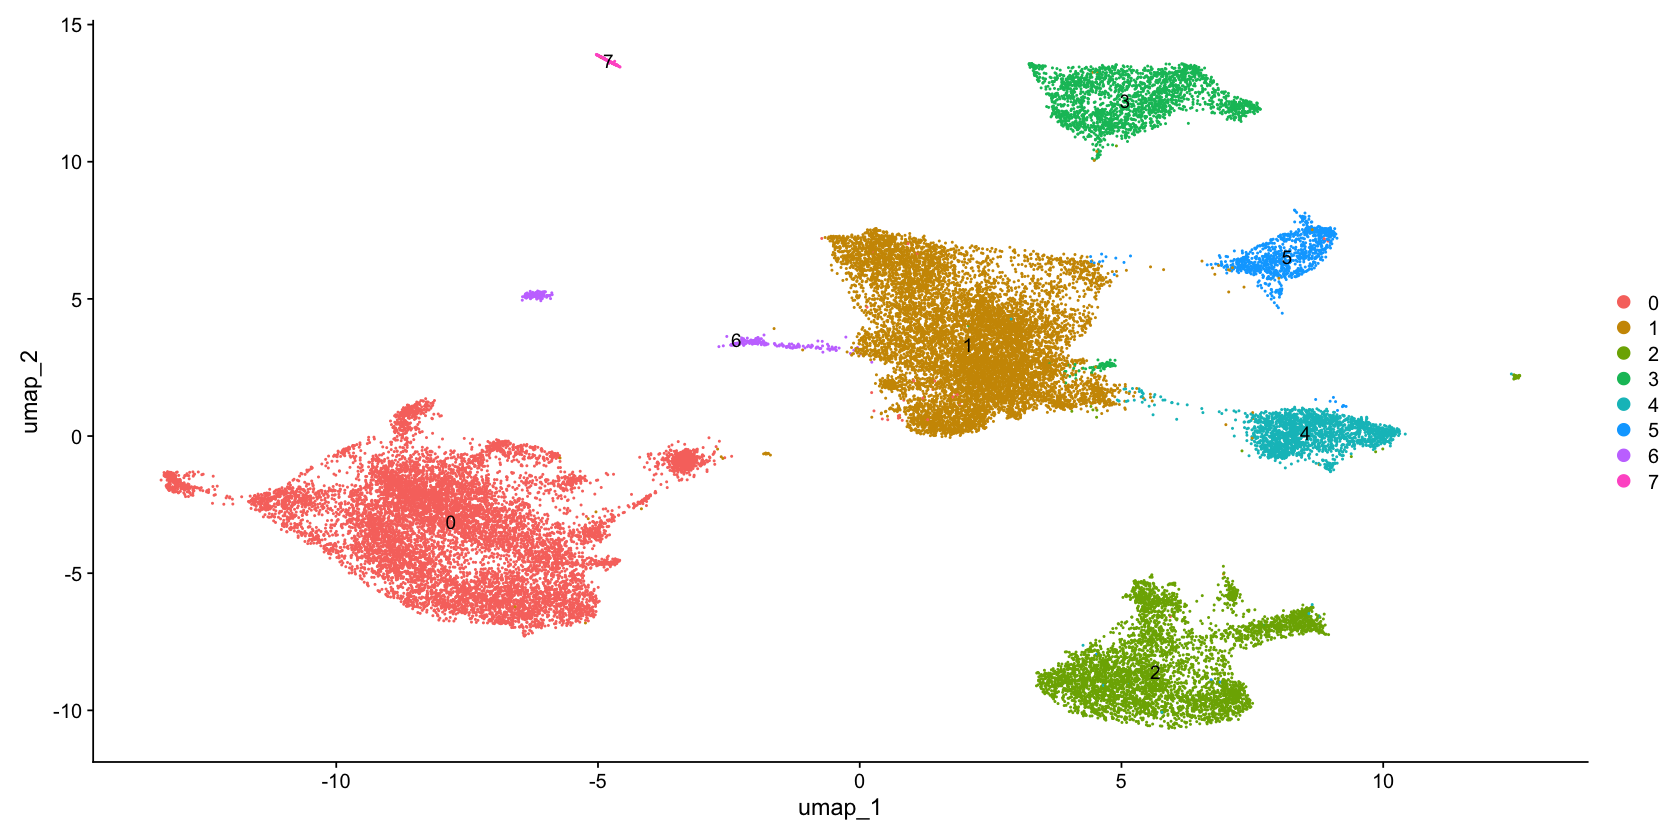

In [19]:
seurat_obj <- SetIdent(seurat_obj, value = "RNA_snn_res.0.05")
umap <- DimPlot(seurat_obj, reduction = "umap", label = TRUE)
umap


In [20]:
markers <- read.table("./in/marker_list.tsv", header=TRUE)
marker_list = list()
for (i in 1:nrow(markers)) {
    cell_type <- markers[i,]$CELL_TYPE
    marker_obj <- strsplit(markers[i,]$MARKERS, split=",")
    marker_list[[cell_type]] <- marker_obj[[1]]
}

In [21]:
create_and_save_dotplot <- function(cell_type, seurat_obj, marker_list, output_dir, umap) {
  options(repr.plot.width = 14, repr.plot.height = 7)

  if (!cell_type %in% names(marker_list)) {
    stop(paste("Cell type", cell_type, "not found in marker list"))
  }

  dotplot <- DotPlot(seurat_obj, features = marker_list[[cell_type]]) +
    RotatedAxis() +
    scale_colour_gradientn(colours = c("blue", "white", "red"), space = "Lab") +
    theme_minimal() +
    theme(
      legend.position = "right",
      axis.text.x = element_text(angle = 45, hjust = 1),
      plot.title = element_text(hjust = 0.5) 
    ) +
    ggtitle(paste("Expression of Markers Across Cell Types:", cell_type))

  
  combined_plot <- dotplot | umap

return(combined_plot)
}

In [22]:

cell_types <- c("NEURONS", "ASTROCYTES", "ENDOTHELIAL", "PERICYTES", 
                "MESENCHYMAL", "MICROGLIA", "TAMS", "T", "NK", "B", 
                "TUMOR", "MES-LIKE", "AC-LIKE", "OPC-LIKE", "NPC-LIKE")

output_dir <- "out/dotplots" 
if (!dir.exists(output_dir)) {
  dir.create(output_dir)
}

plot_list <- list()
combined_plot <- for (cell_type in cell_types) {
  pltobj <- create_and_save_dotplot(cell_type, seurat_obj, marker_list, output_dir, umap)
  plot_list[[cell_type]] <- pltobj
}




Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
"The following requested variables were not found: CD31"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
"The following requested variables were not found: CD13"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace 

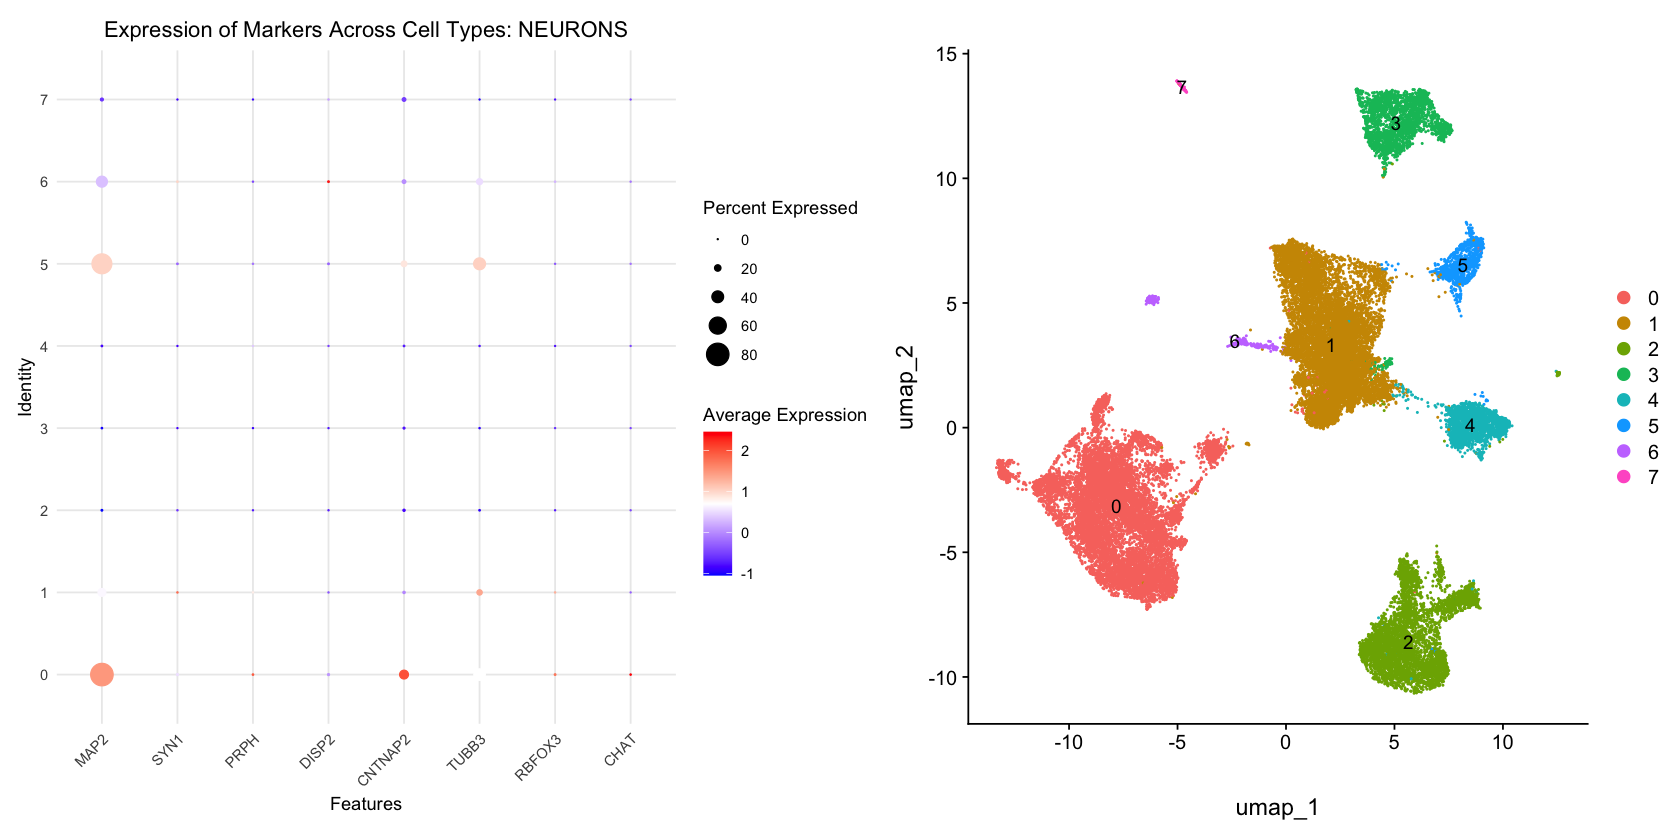

In [23]:
plot_list[["NEURONS"]]

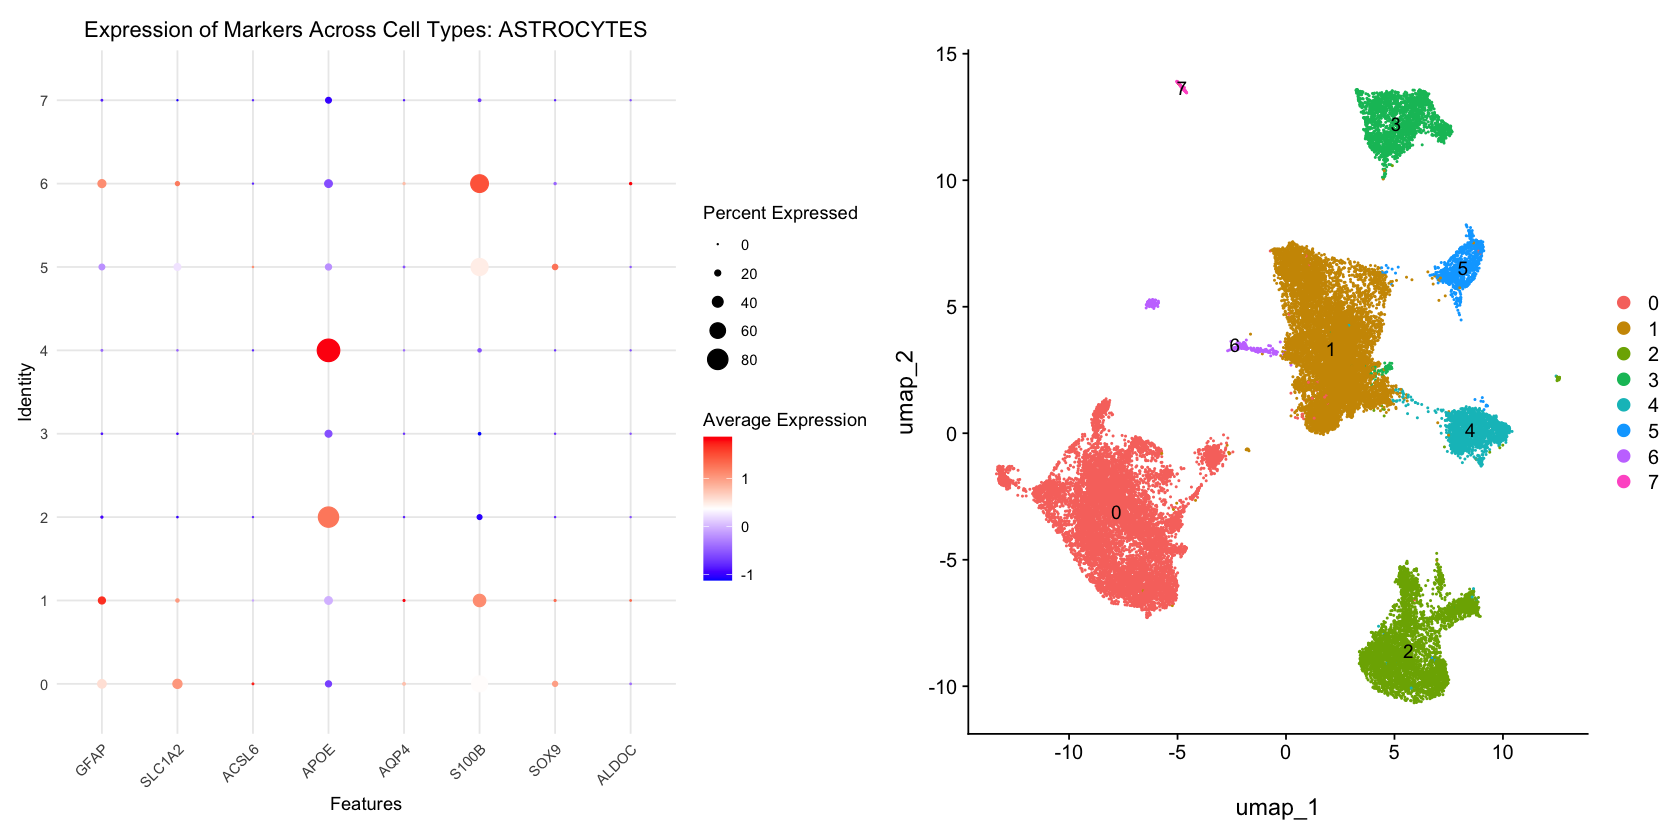

In [24]:
plot_list[["ASTROCYTES"]]

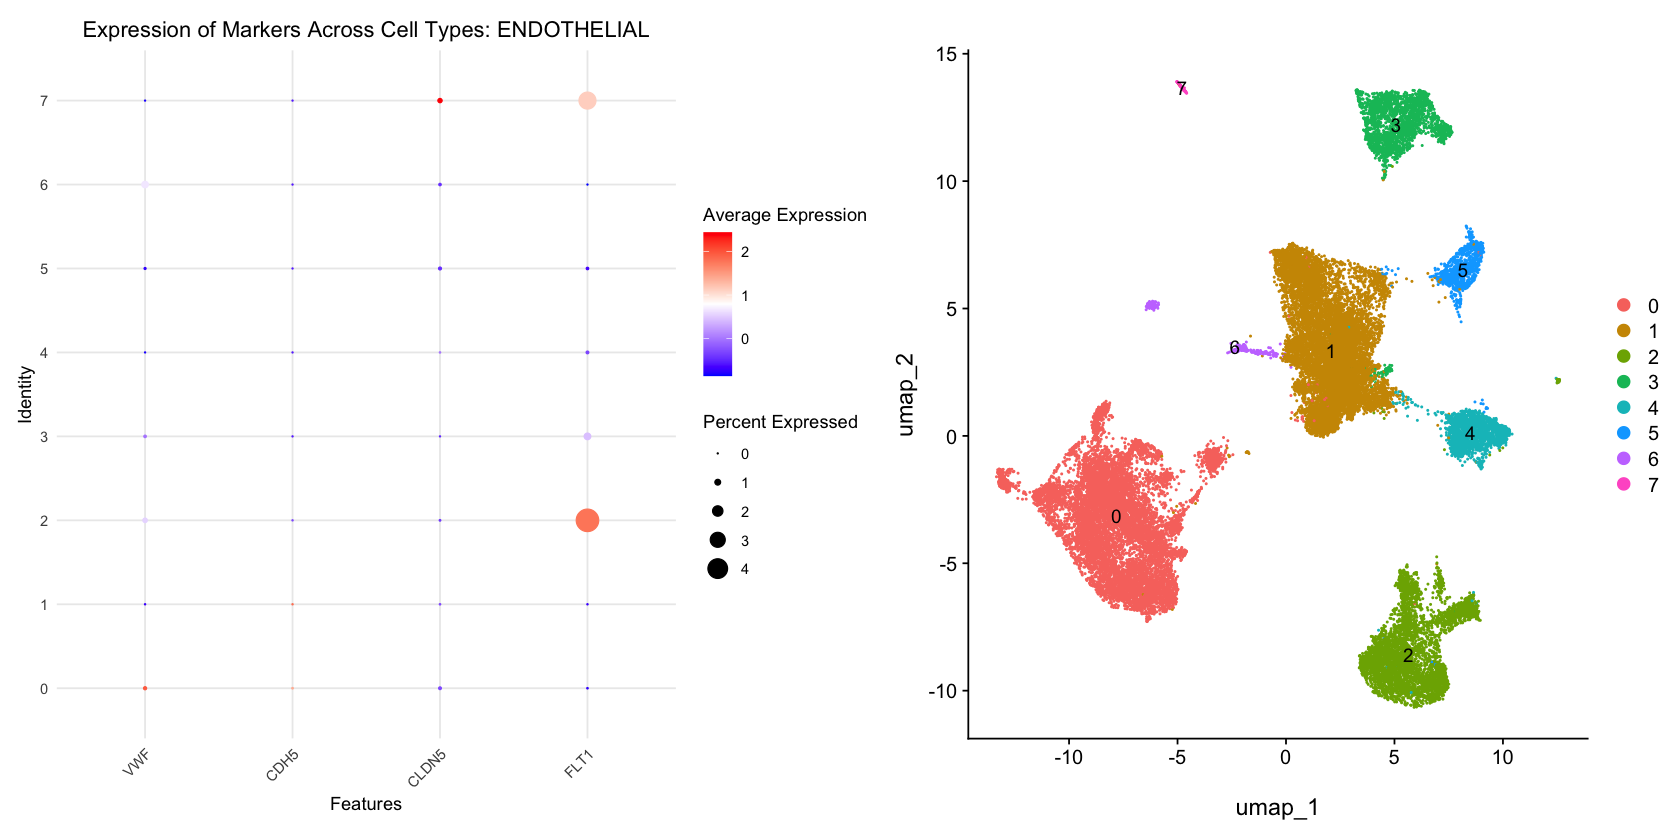

In [25]:
plot_list[["ENDOTHELIAL"]]

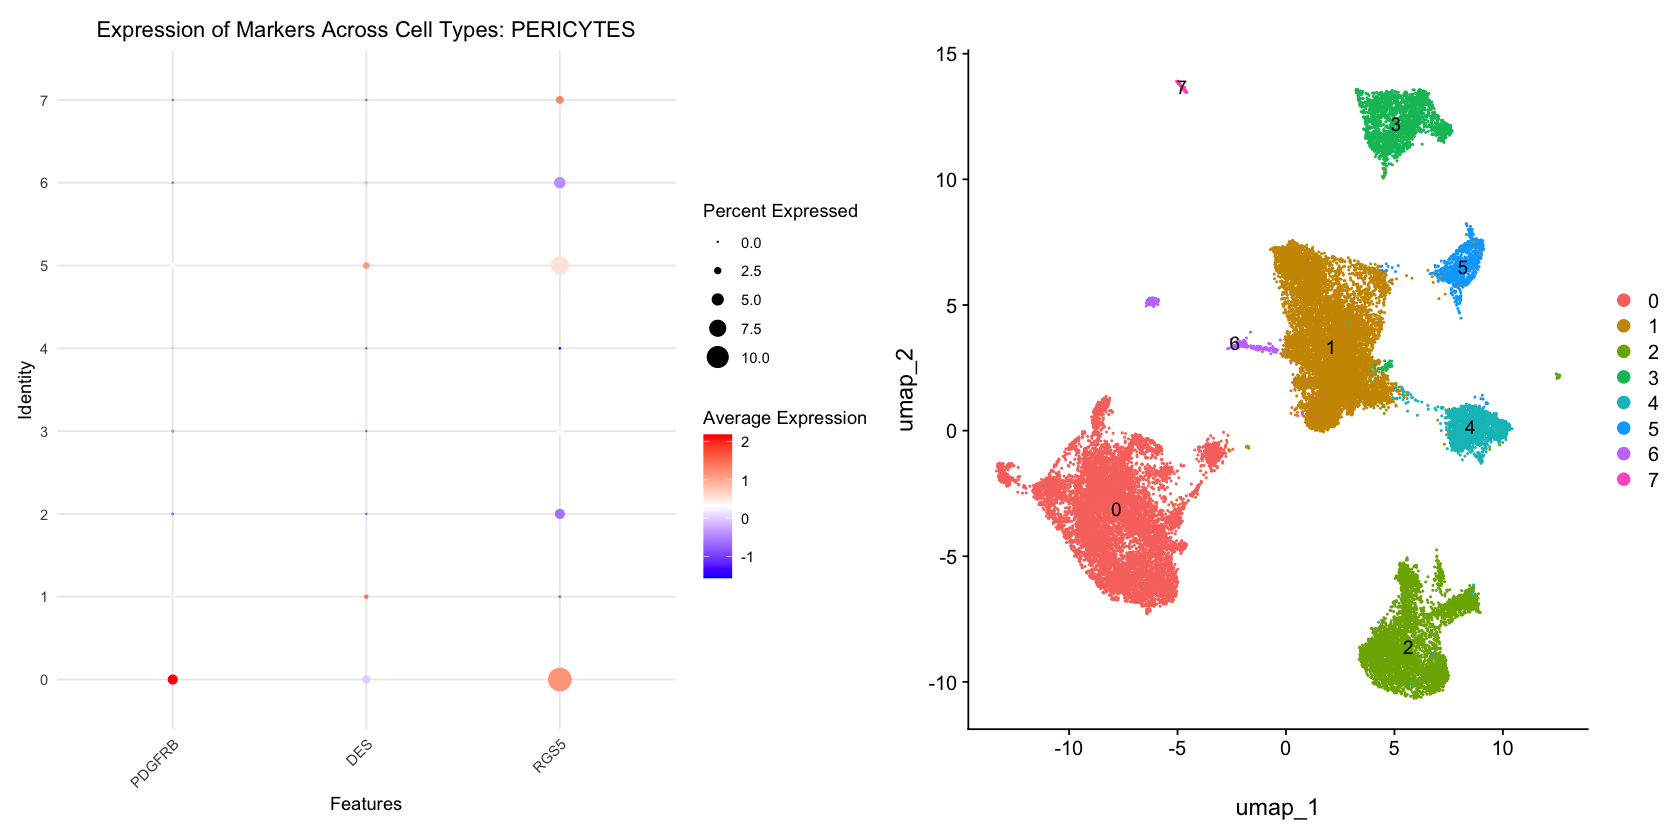

In [26]:
plot_list[["PERICYTES"]]

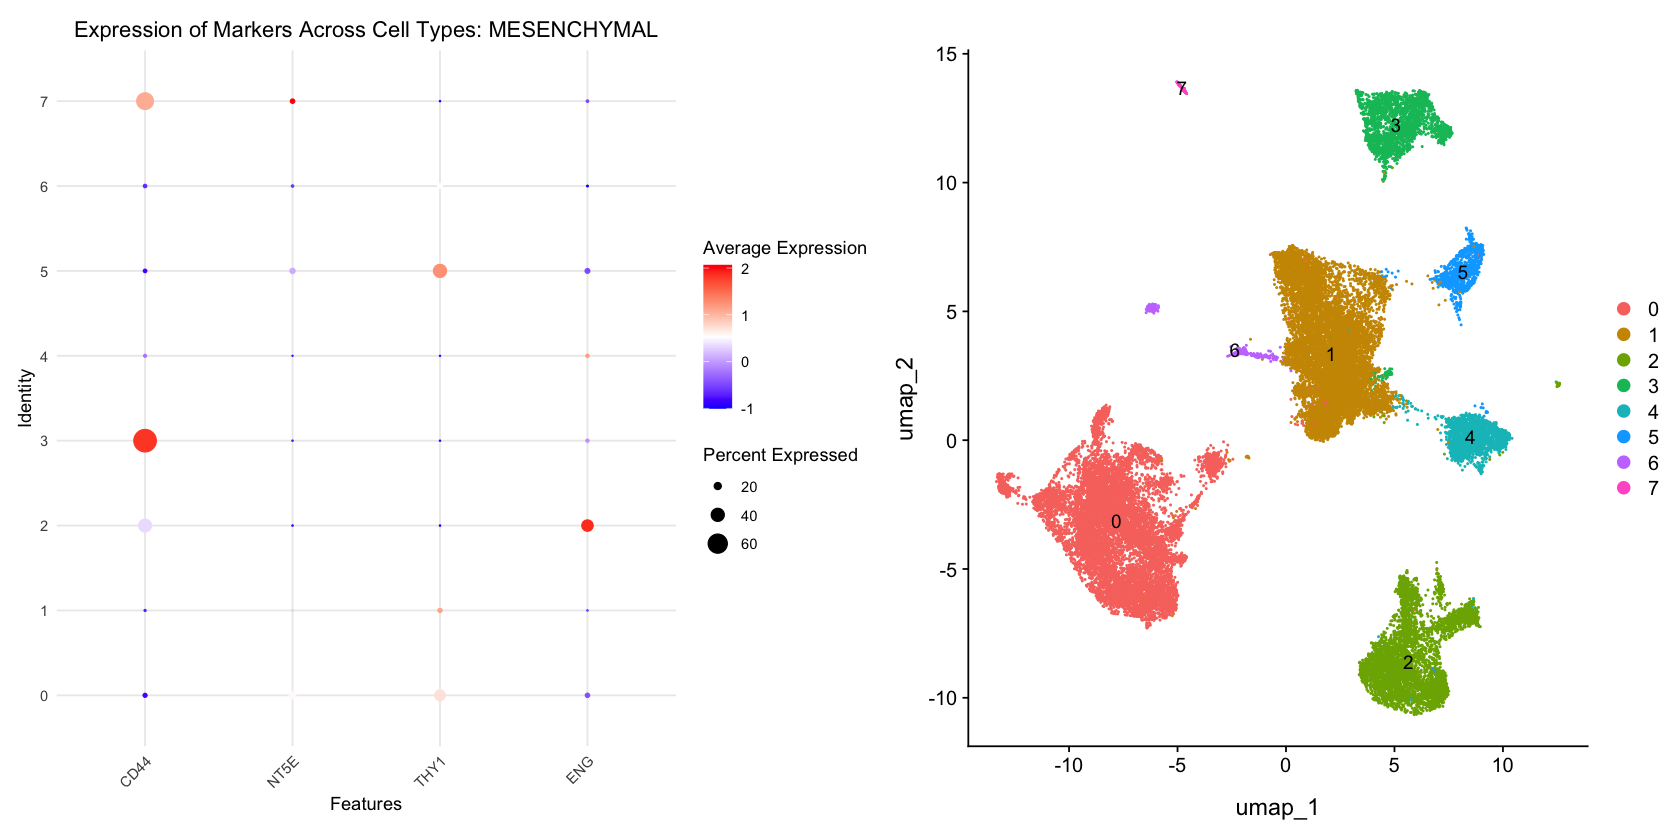

In [27]:
plot_list[["MESENCHYMAL"]]

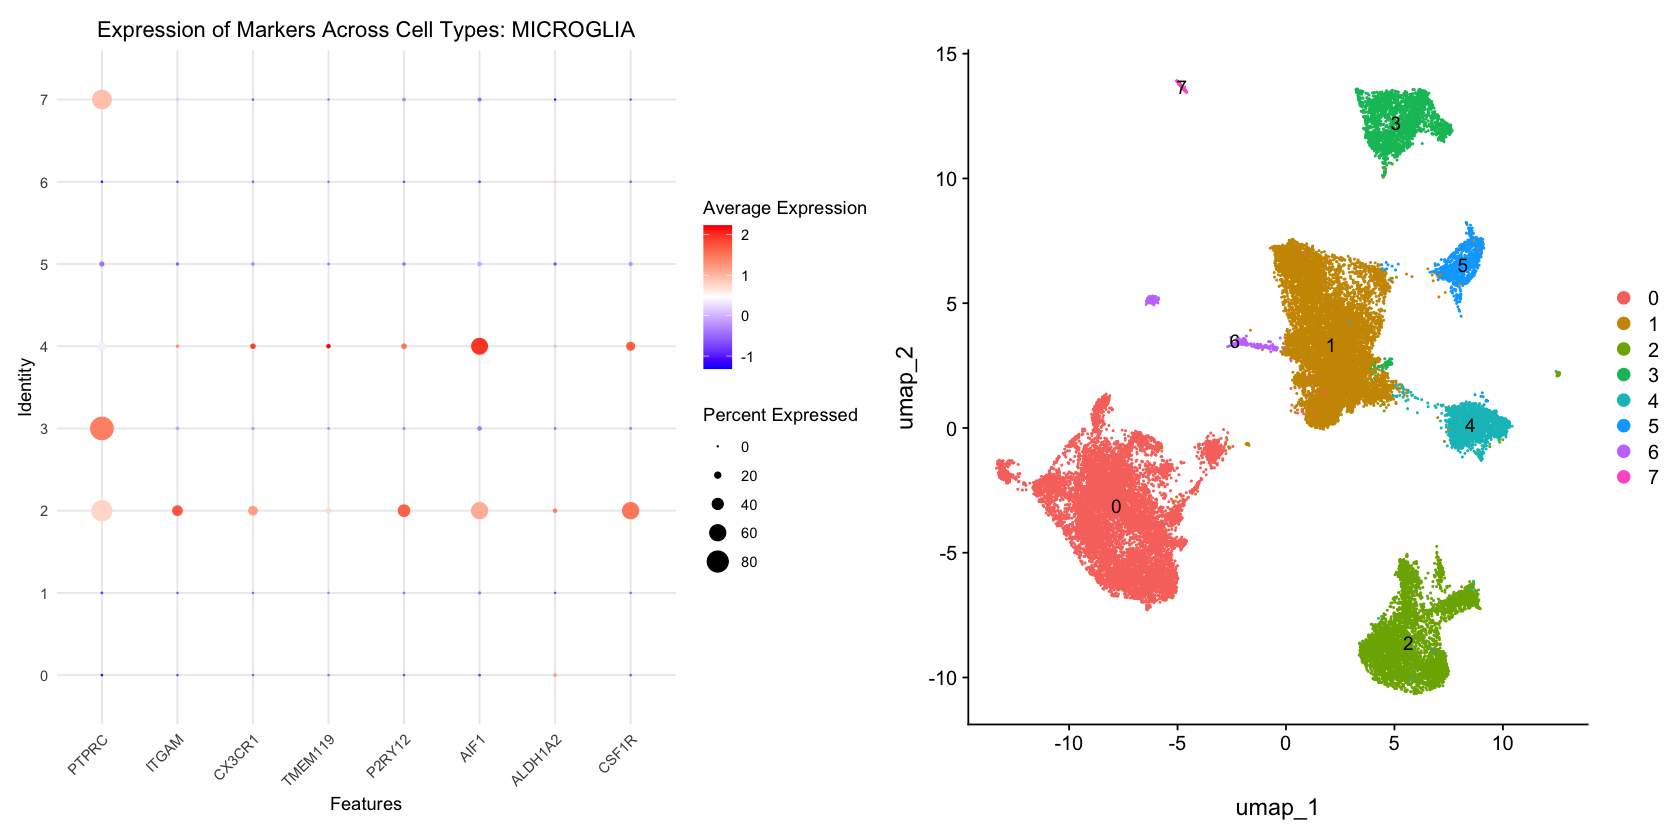

In [28]:
plot_list[["MICROGLIA"]]

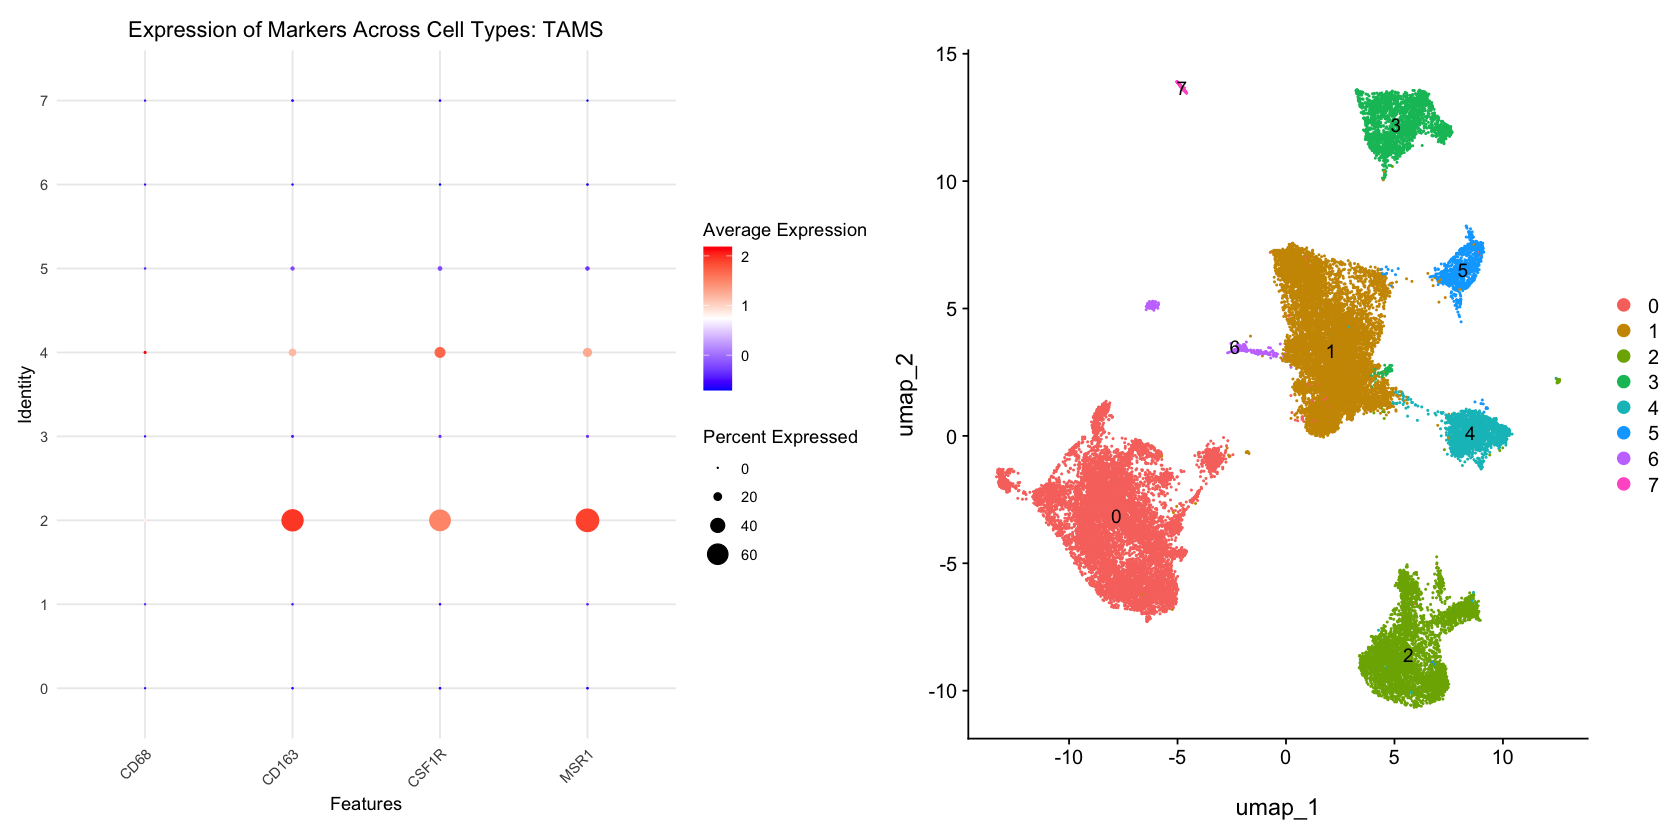

In [29]:
plot_list[["TAMS"]]

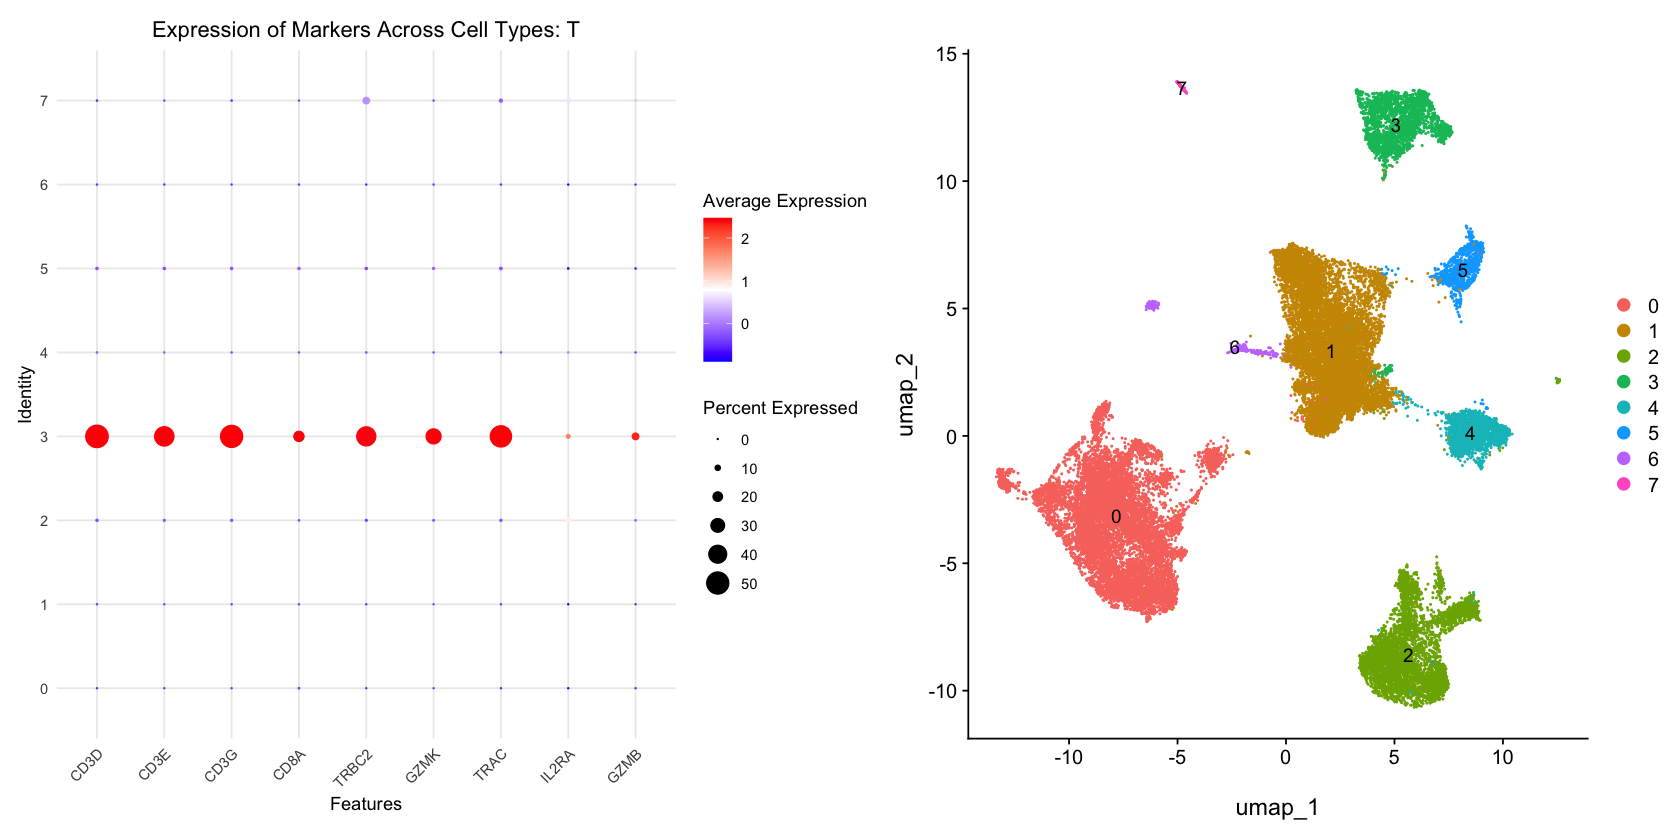

In [30]:
plot_list[["T"]]

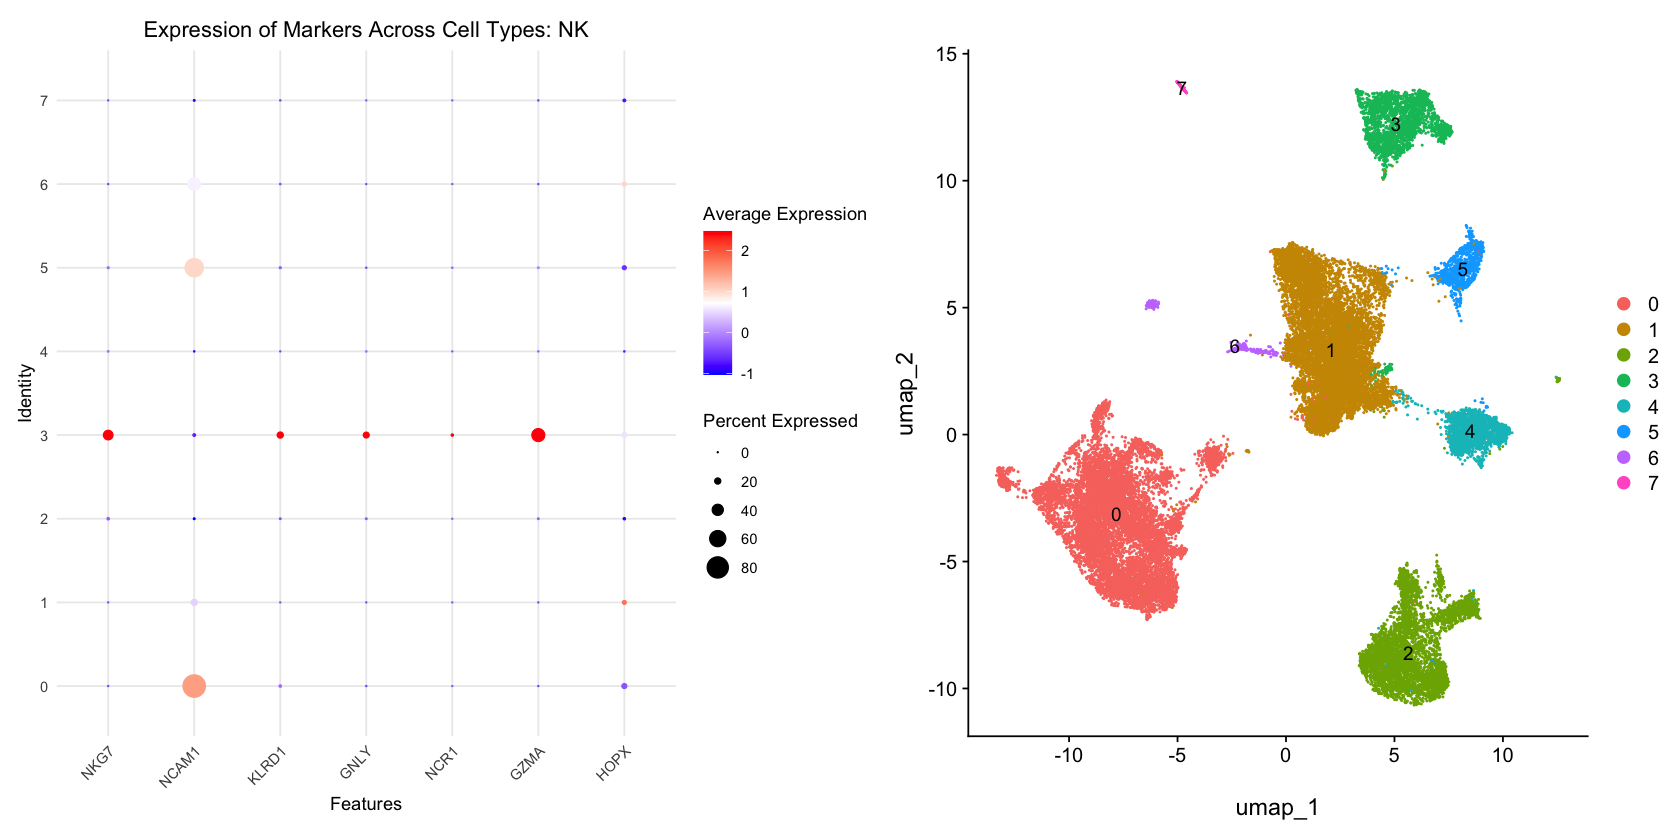

In [31]:
plot_list[["NK"]]

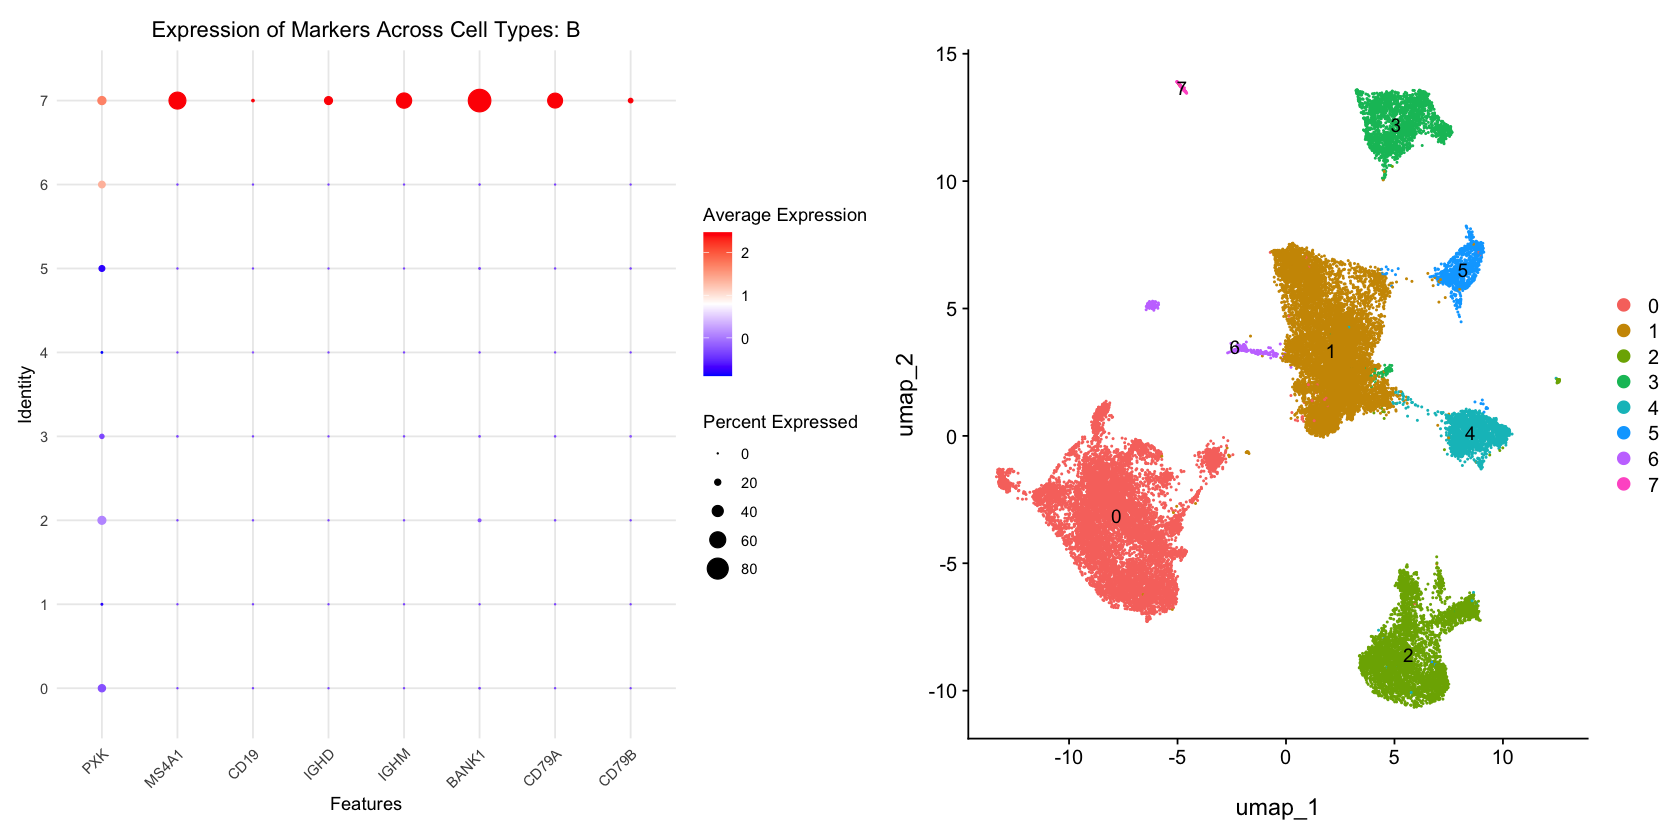

In [32]:
plot_list[["B"]]

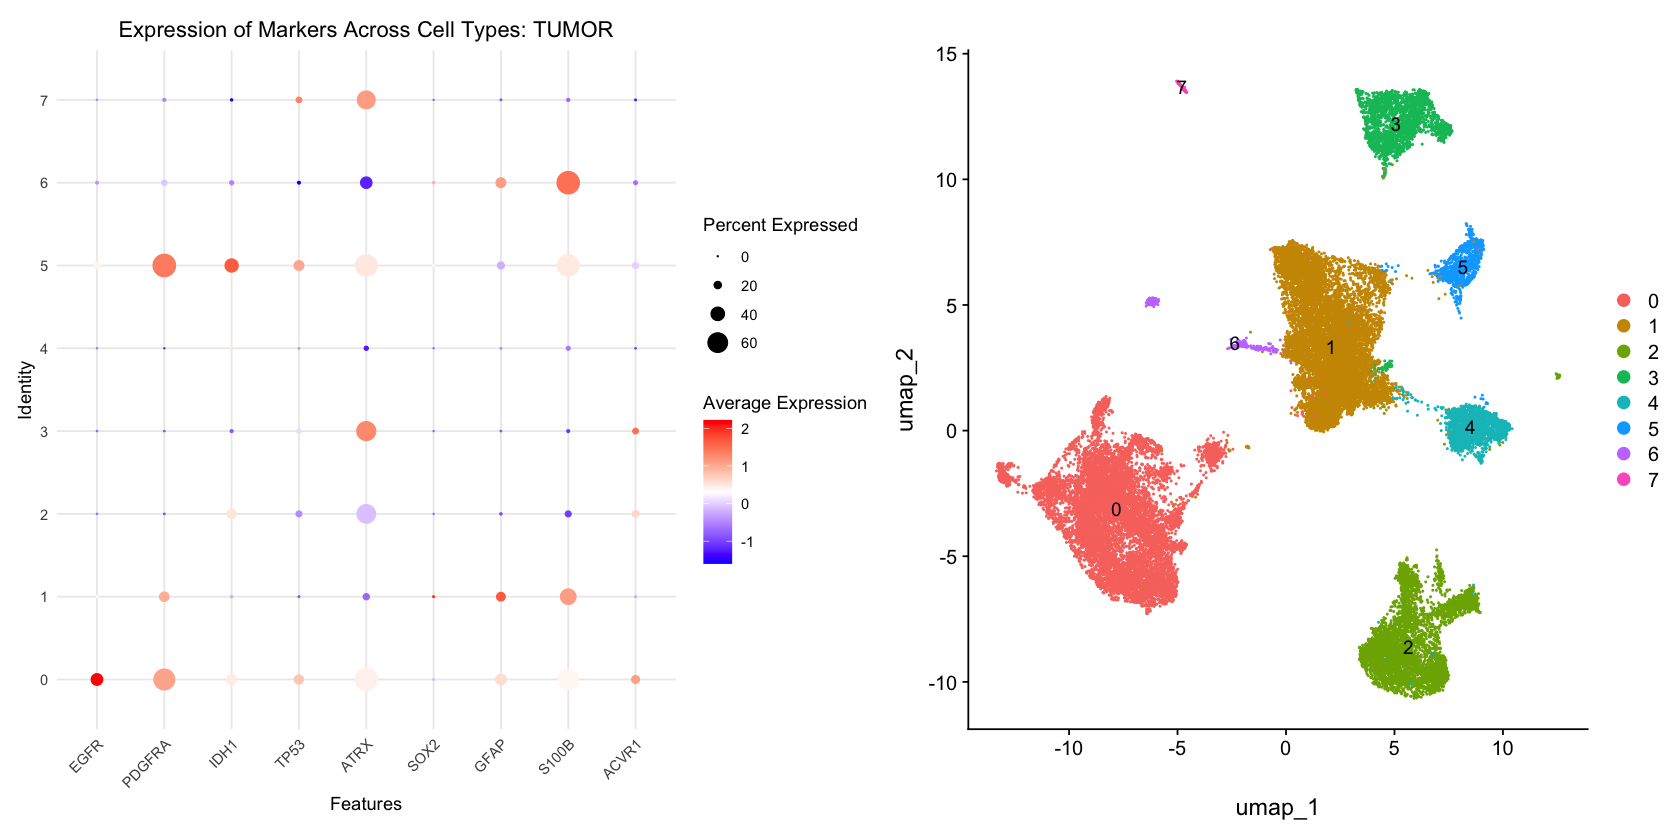

In [33]:
plot_list[["TUMOR"]]

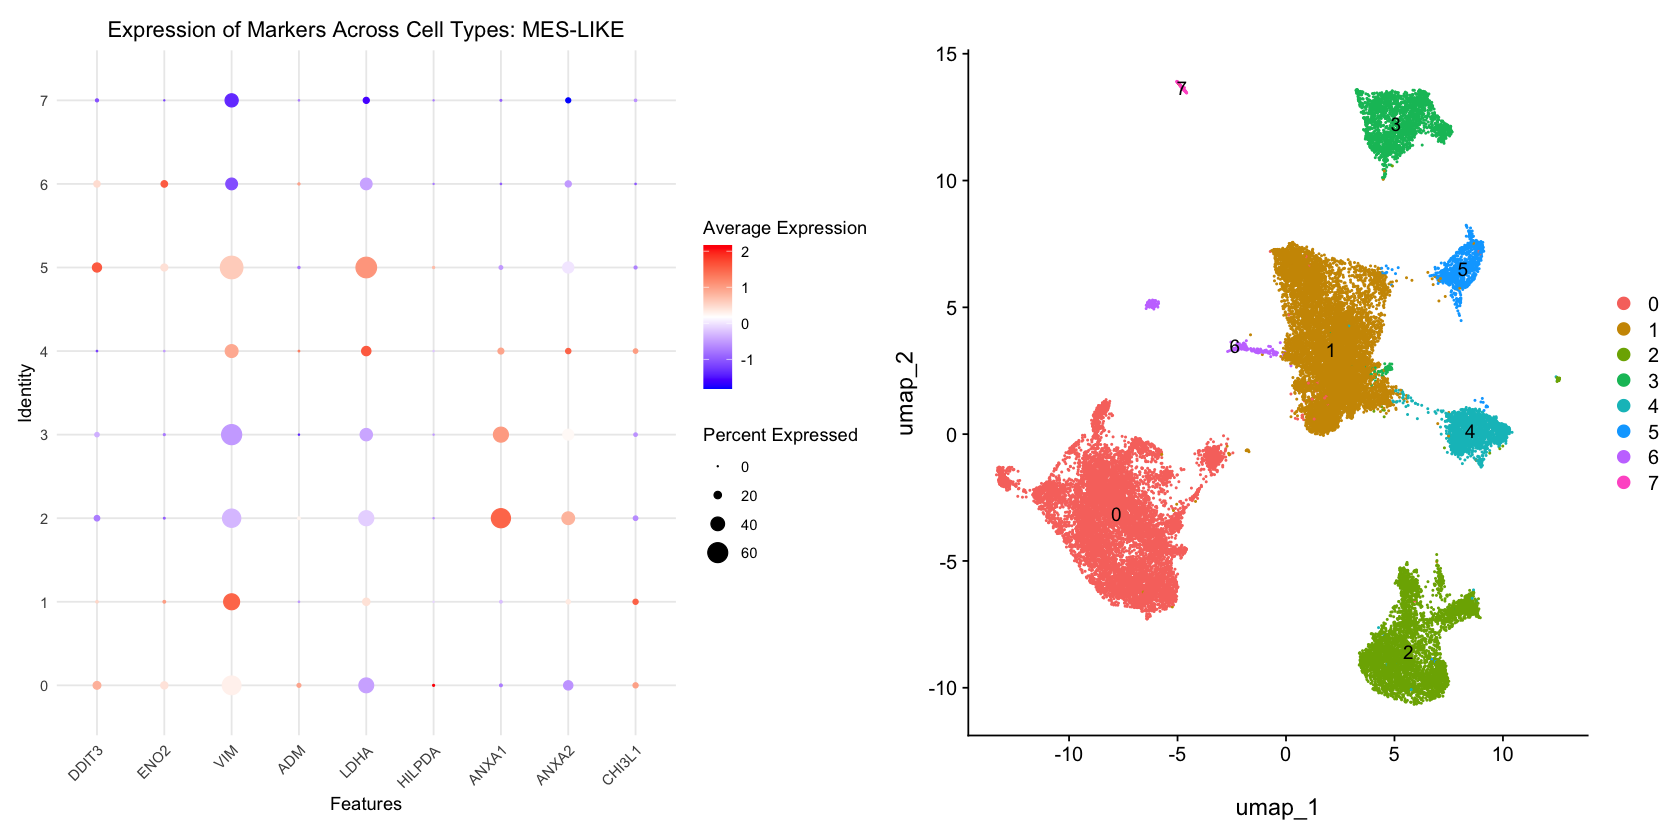

In [34]:
plot_list[["MES-LIKE"]]

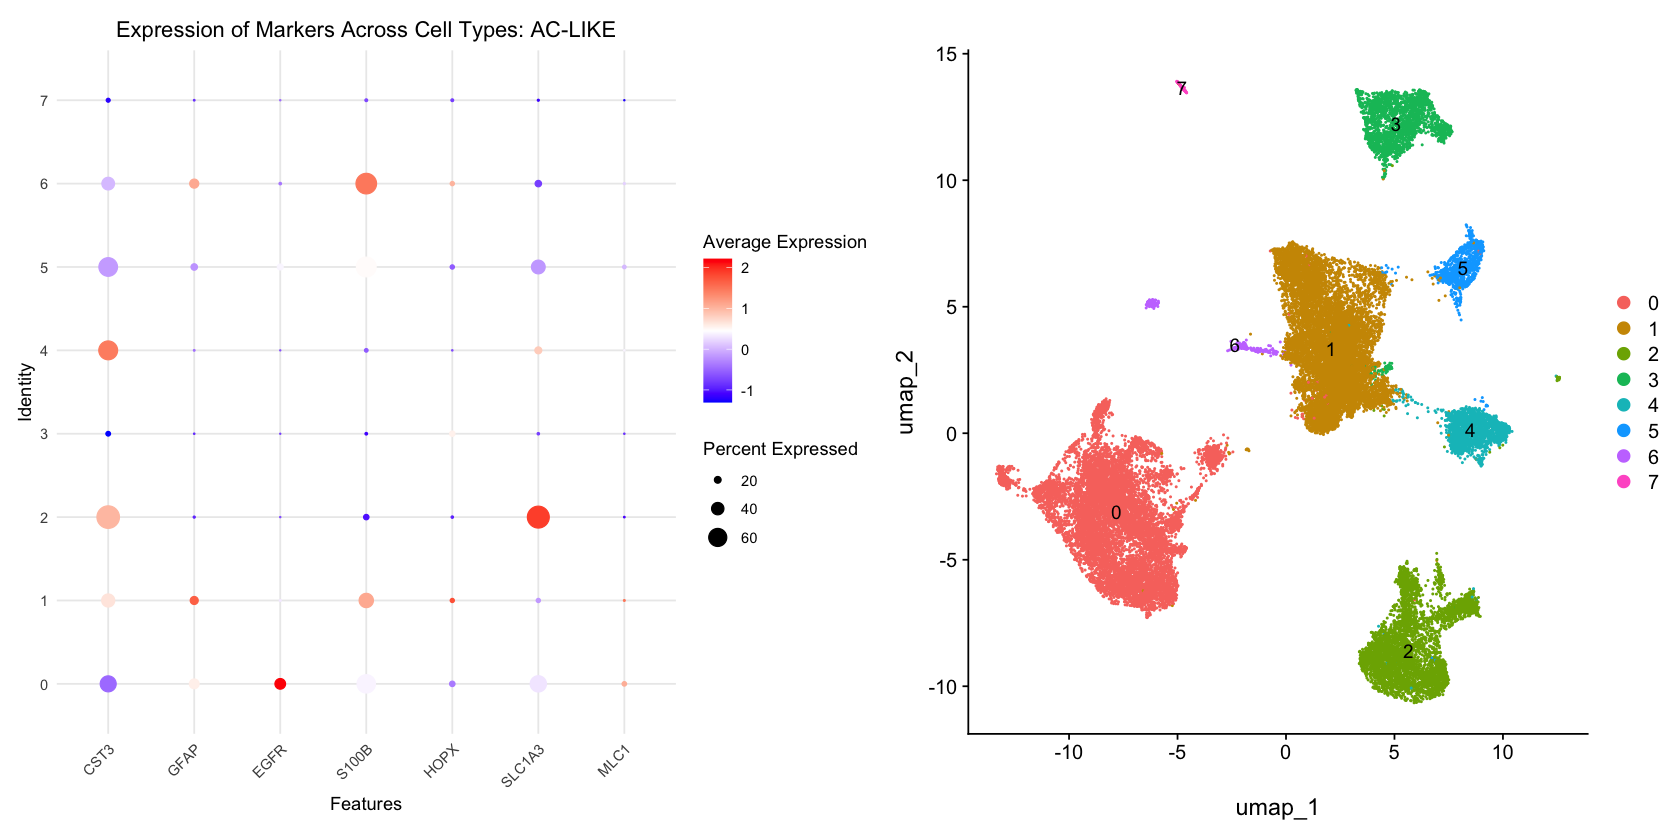

In [35]:
plot_list[["AC-LIKE"]]

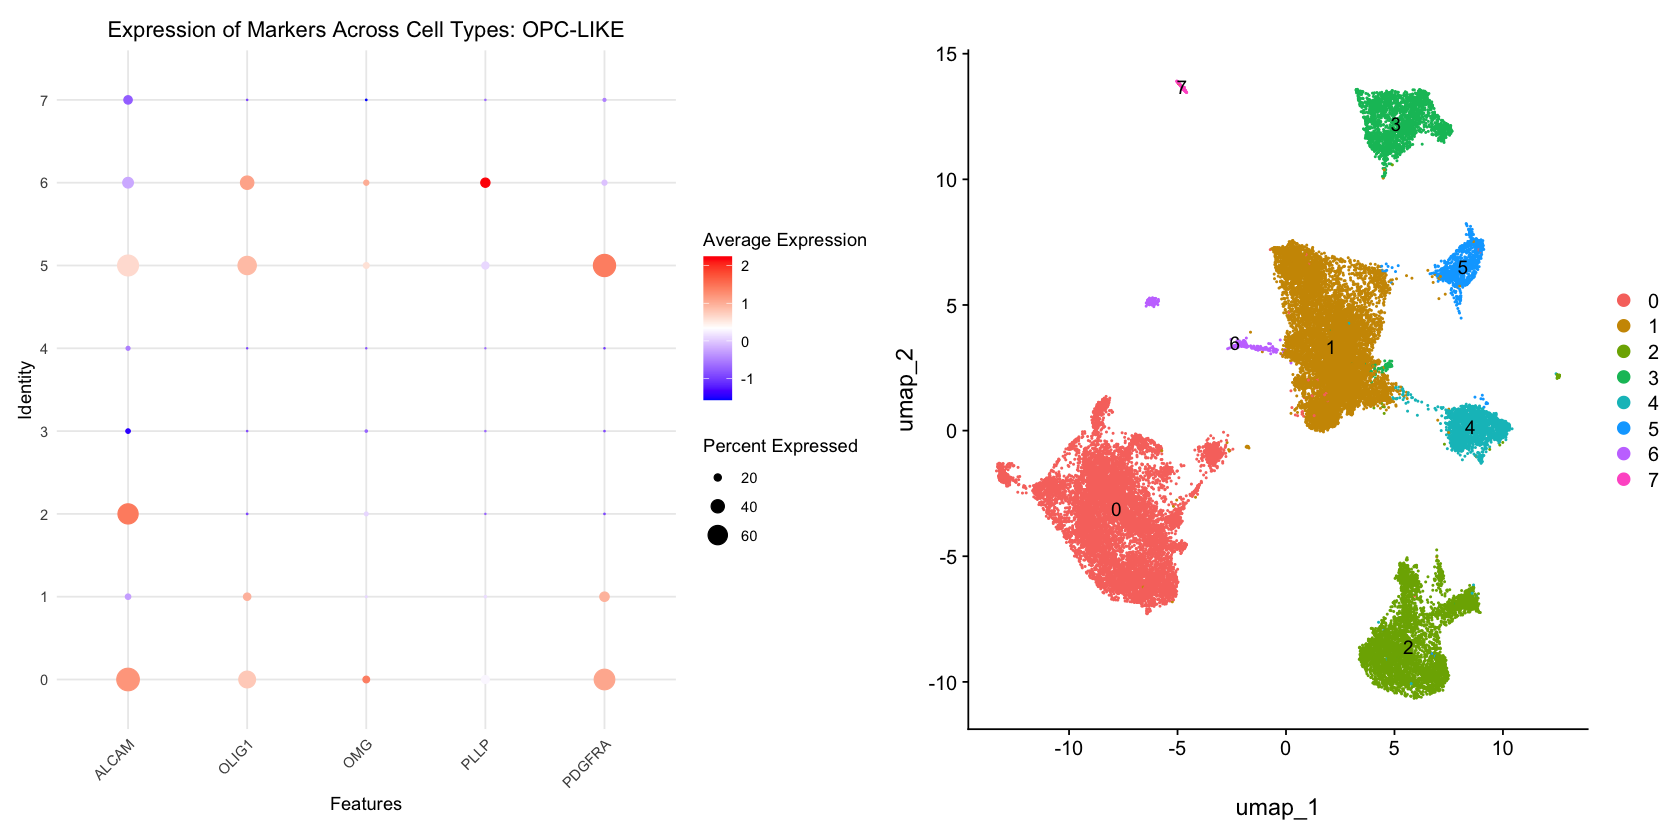

In [36]:
plot_list[[ "OPC-LIKE"]]

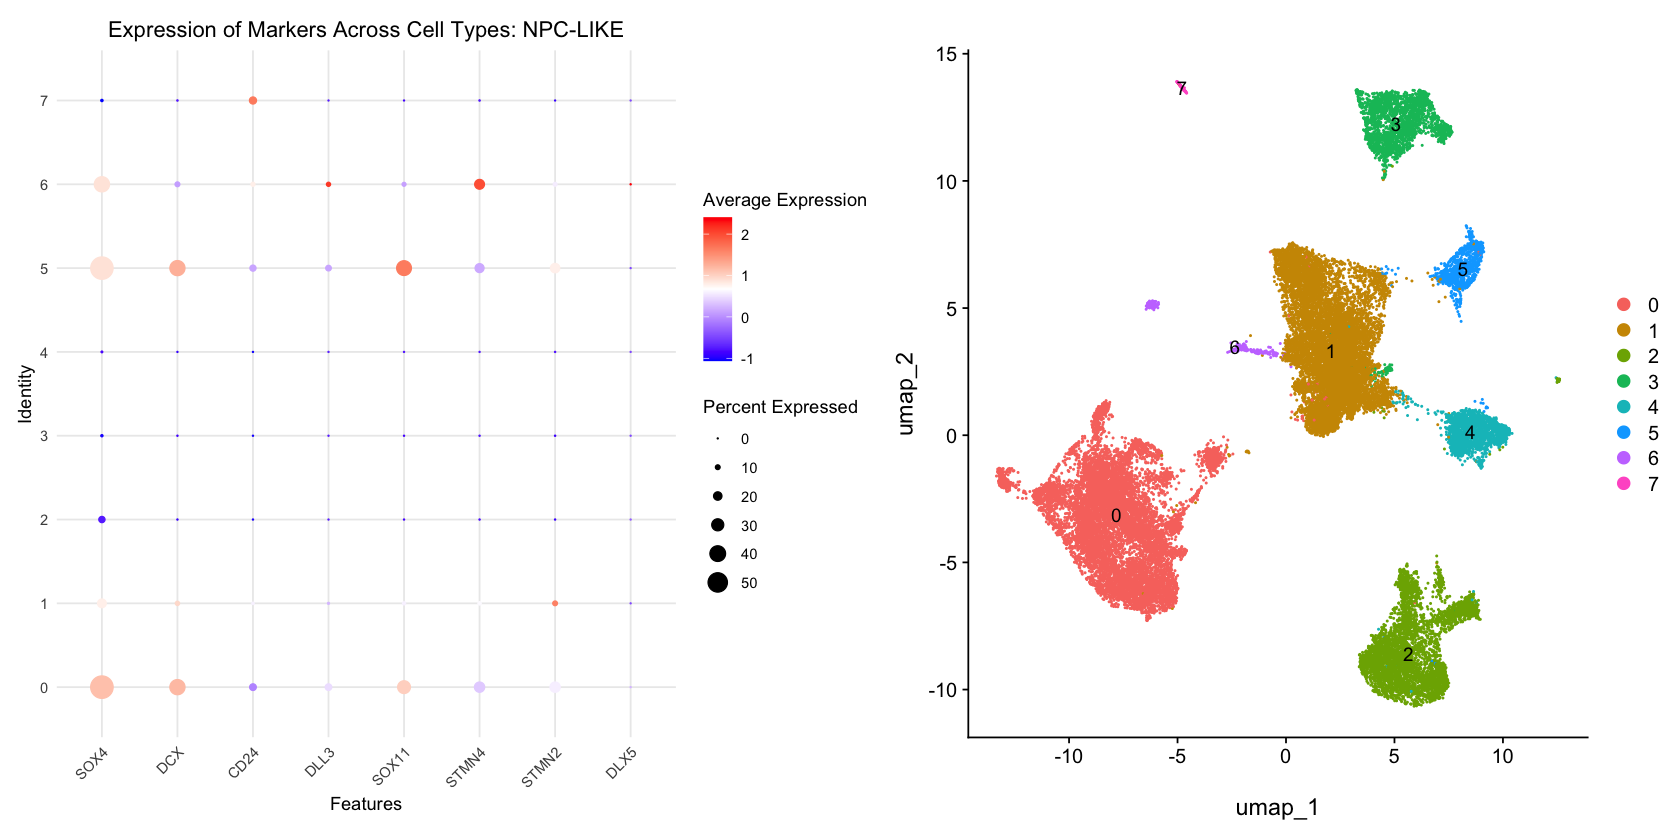

In [37]:
plot_list[["NPC-LIKE"]]